<a href="https://colab.research.google.com/github/YehorSavchenko/AnalitykaDanychUJ/blob/master/Cwiczenia1/Assignment_Optional_1_solution_YehorSavchenko.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
survey_df = pd.read_csv("survey_results_public.csv")
survey_df

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,64858,NaN,Yes,NaN,16,NaN,NaN,NaN,United States,NaN,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,NaN,NaN,10,Less than 1 year
64457,64867,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Morocco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64458,64898,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Viet Nam,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,64925,NaN,Yes,NaN,NaN,NaN,NaN,NaN,Poland,NaN,...,NaN,NaN,NaN,NaN,Angular;Angular.js;React.js,NaN,NaN,NaN,NaN,NaN


In [25]:
survey_categorical_df = survey_df.select_dtypes(include=['object'])
survey_numerical_df = survey_df.select_dtypes(include=['number'])
print(survey_categorical_df.keys())
print(survey_numerical_df.keys())

Index(['MainBranch', 'Hobbyist', 'Age1stCode', 'CompFreq', 'Country',
       'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear',
       'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity',
       'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear',
       'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
       'WebframeWorkedWith', 'WelcomeChange', 'YearsCode', '

In [21]:
schema_df = pd.read_csv('survey_results_schema.csv', index_col='Column')
schema_df.head(100)

,QuestionText
Column,
Respondent,Randomized respondent ID number (not in order ...
MainBranch,Which of the following options best describes ...
Hobbyist,Do you code as a hobby?
Age,What is your age (in years)? If you prefer not...
Age1stCode,At what age did you write your first line of c...
...,...
WebframeWorkedWith,Which web frameworks have you done extensive d...
WelcomeChange,"Compared to last year, how welcome do you feel..."
WorkWeekHrs,"On average, how many hours per week do you wor..."


In [26]:
schema_raw = schema_df['QuestionText']
schema_raw 

Column
Respondent            Randomized respondent ID number (not in order ...
MainBranch            Which of the following options best describes ...
Hobbyist                                        Do you code as a hobby?
Age                   What is your age (in years)? If you prefer not...
Age1stCode            At what age did you write your first line of c...
                                            ...                        
WebframeWorkedWith    Which web frameworks have you done extensive d...
WelcomeChange         Compared to last year, how welcome do you feel...
WorkWeekHrs           On average, how many hours per week do you wor...
YearsCode             Including any education, how many years have y...
YearsCodePro          NOT including education, how many years have y...
Name: QuestionText, Length: 61, dtype: object

In [28]:
schema_raw['Trans']

'Are you transgender?'

In [80]:
trans_yes_answers_df = survey_df[survey_df['Trans']=='No'].reset_index(drop=True)
print(trans_yes_answers_df['Country'].value_counts())
print(sum(trans_yes_answers_df['Country'].value_counts()))

United States     10201
India              5221
Germany            3255
United Kingdom     3175
Canada             1782
                  ...  
Nauru                 1
Liechtenstein         1
Monaco                1
Niger                 1
Cape Verde            1
Name: Country, Length: 170, dtype: int64
48871


In [81]:
trans_yes_answers_df = survey_df[survey_df['Trans'].isnull()].reset_index(drop=True)
print(trans_yes_answers_df['Country'].value_counts())
print(sum(trans_yes_answers_df['Country'].value_counts()))

India                               3163
United States                       2102
United Kingdom                       676
Germany                              609
Canada                               394
                                    ... 
Fiji                                   1
Chad                                   1
Democratic Republic of the Congo       1
Kiribati                               1
Monaco                                 1
Name: Country, Length: 174, dtype: int64
14727


In [83]:
trans_yes_answers_df = survey_df[survey_df['Trans']=='Yes'].reset_index(drop=True)
print(trans_yes_answers_df['Country'].value_counts())
print(sum(trans_yes_answers_df['Country'].value_counts()))

United States     166
United Kingdom     45
Germany            26
India              19
Canada             15
                 ... 
Czech Republic      1
Zambia              1
Hungary             1
Albania             1
Cambodia            1
Name: Country, Length: 73, dtype: int64
474


In [84]:
import folium 
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'
country_counts = trans_yes_answers_df.Country.value_counts()
country_counts_df = pd.DataFrame({ 'Country': country_counts.index, 'Count': country_counts.values})
country_counts_df

,Country,Count
0,United States,166
1,United Kingdom,45
2,Germany,26
3,India,19
4,Canada,15
...,...,...
68,Czech Republic,1
69,Zambia,1
70,Hungary,1
71,Albania,1


In [102]:
country_counts_df.at[0, 'Country'] = 'United States of America'
country_counts_df.at[13, 'Country'] = 'Russia'
#country_counts_df[country_counts_df['Country']=='Russian Federation']['Country'] = 'Russia'
country_counts_df




#zrobic na procentowe 'yes'/total in the country

,Country,Count
0,United States of America,166
1,United Kingdom,45
2,Germany,26
3,India,19
4,Canada,15
...,...,...
68,Czech Republic,1
69,Zambia,1
70,Hungary,1
71,Albania,1


In [ ]:
f = f.clip_upper(Threshold)

In [107]:
m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,
    columns=["Country", "Count"],
    key_on="feature.properties.name",
    threshold_scale=[1, 5, 10, 25, 50, 80, 120, 168],
    fill_color="OrRd",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Respondents",
).add_to(m)

m

In [ ]:
countries_geojson = 'https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json'#b) 
# Printed the variable list and selected categorical and numerical variables
# Numerical - take on numerical values sensible to add,subtract, take averages etc.
# Categorical - take on a limited number of distinct categories. Categories cand
#  be identifed with numbers, but not sensible to do arithmetic operations
# Listed by keys()
house_categorical_df = data_frame.select_dtypes(include=['object'])
house_numerical_df = data_frame.select_dtypes(include=['number'])
print(house_categorical_df.keys())
print(house_numerical_df.keys())

Index(['date'], dtype='object')
Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
#c)
# The describe() method is used for calculating some statistical data like percentile,
# mean and std of the numerical values of the Series or DataFrame. It analyzes both
# numeric and object series and also the DataFrame column sets of mixed data types.
# I think the meaningful of statistics depends on the dataset. 
# Because we can see different statistical data. 
# For example, in our example, column 'id' is unnecessary, or data about count gives us nothing.

house_numerical_df.describe()
#Hint: Function describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

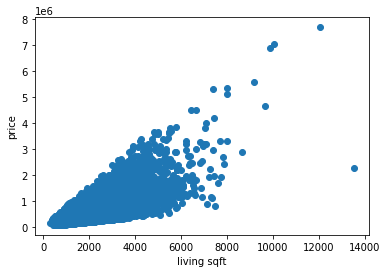

In [ ]:
#a)
# Relation of square footage and price by plt.scatter()
# where x = sqft_living, y = price
plt.scatter(data_frame['sqft_living'], data_frame['price'])
plt.xlabel('living sqft')
plt.ylabel('price')
plt.show()
#Hint plt.scatter

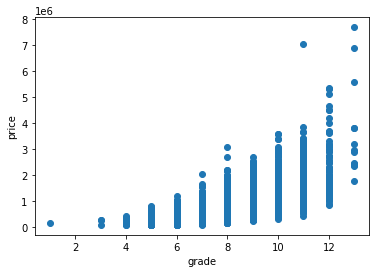

In [ ]:
#b)
# Relation of grade and price by plt.scatter()
# where x = grade, y = price
# Other variables e.g condition, zipcode, location etc.
plt.scatter(data_frame['grade'], data_frame['price'])
plt.xlabel('grade')
plt.ylabel('price')
plt.show()

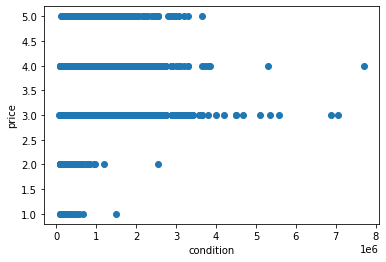

In [ ]:
# Relation of condition and price by plt.scatter()
# where x = price, y = condition
plt.scatter(data_frame['price'], data_frame['condition'])
plt.xlabel('condition')
plt.ylabel('price')
plt.show()

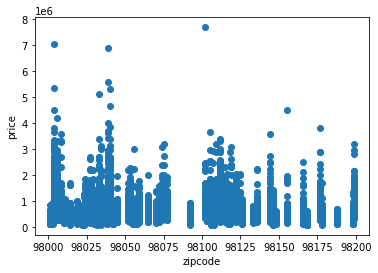

In [ ]:
#c)
# Relation of zipcode and price by plt.scatter()
# where x = grade, y = price
# We can see different pricce by zipcode 
# The most expensive in 98100 zipcode
plt.scatter(data_frame['zipcode'], data_frame['price'])
plt.xlabel('zipcode')
plt.ylabel('price')
plt.show()

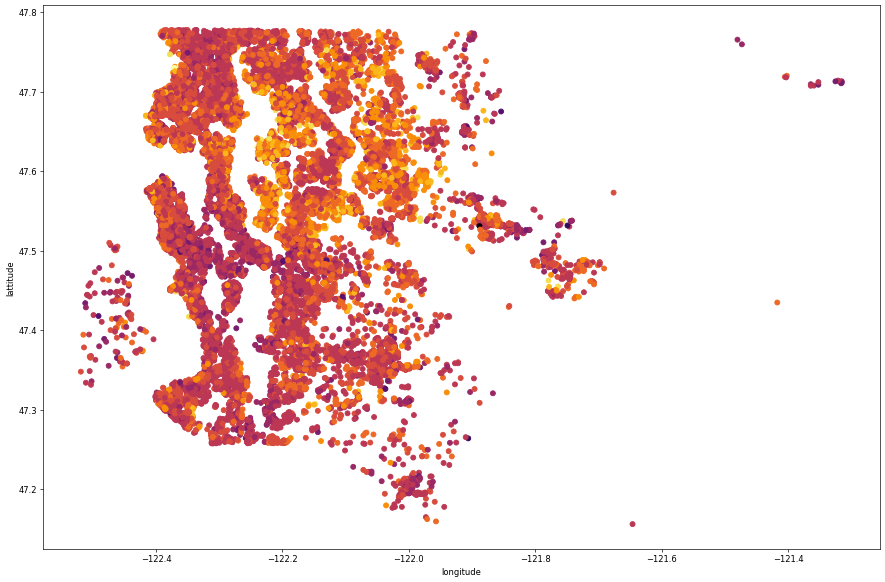

In [ ]:
# Relation of longitude and lattitude and grade(is marker) by plt.scatter()
# We can see location of houses and сorrelation of scores. 
# The brighter the color, the higher the score. Darker color - lower score
plt.figure(figsize=(18, 12), dpi=60)
plt.scatter(data_frame['long'], data_frame['lat'], c=data_frame['grade'], cmap='inferno')
plt.xlabel('longitude')
plt.ylabel('lattitude')
plt.show()

## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


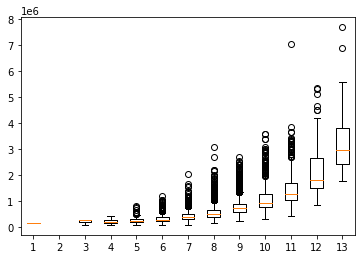

In [ ]:
#a)
# Boxplot shows how the price of house is spread for each grade.
data = []
for i in range(1,14):
  data.append(data_frame[data_frame['grade']==i]['price'])
plt.boxplot(data)
plt.show() 

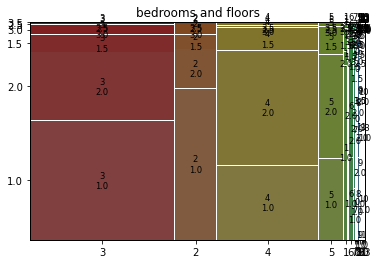

In [ ]:
#b)
# A mosaic plot, Marimekko chart, or sometimes percent stacked bar plot is a 
# graphical visualization of data from two or more qualitative variables
# First plot more understandable
from statsmodels.graphics.mosaicplot import mosaic

mosaic(data=data_frame, index=['bedrooms', 'floors'], title='bedrooms and floors')
plt.show()


## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [ ]:
#a)
# The basic statisctics of apartments, where bedrooms = 3, bathrooms = 2, floors = 2
# loc() - access a group of rows and columns by label(s) or a boolean array.
data_frame2 = data_frame.loc[(data_frame['bedrooms'] == 3) & (data_frame['bathrooms'] == 2) & (data_frame['floors'] == 2)]
data_frame2.describe()
#Hint: pandas.DataFrame.loc

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.540000e+02,1.540000e+02,154.0,154.0,154.000000,154.000000,154.0,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,4.397177e+09,5.144986e+05,3.0,2.0,1850.279221,23678.948052,2.0,0.006494,0.357143,3.435065,7.551948,1717.422078,132.857143,1969.779221,284.863636,98085.577922,47.567376,-122.247091,1802.337662,17545.123377
std,2.849813e+09,2.497661e+05,0.0,0.0,547.585413,83324.024708,0.0,0.080582,0.919495,0.713322,0.832684,527.473851,248.092631,34.654456,700.057328,48.808788,0.143221,0.150507,453.210930,40404.134611
min,7.600057e+06,2.090000e+05,3.0,2.0,1020.000000,700.000000,2.0,0.000000,0.000000,2.000000,6.000000,720.000000,0.000000,1900.000000,0.000000,98001.000000,47.194700,-122.519000,850.000000,886.000000
25%,2.060901e+09,3.769750e+05,3.0,2.0,1452.500000,3414.750000,2.0,0.000000,0.000000,3.000000,7.000000,1402.500000,0.000000,1942.250000,0.000000,98038.500000,47.498800,-122.361750,1452.500000,4020.000000
50%,3.630010e+09,4.640000e+05,3.0,2.0,1700.000000,5868.500000,2.0,0.000000,0.000000,3.000000,7.000000,1625.000000,0.000000,1984.500000,0.000000,98103.000000,47.584750,-122.299500,1725.000000,6278.000000
75%,7.184074e+09,5.894625e+05,3.0,2.0,2127.500000,10800.250000,2.0,0.000000,0.000000,4.000000,8.000000,1977.500000,207.500000,1997.500000,0.000000,98122.000000,47.682400,-122.149250,2117.500000,10392.250000
max,9.829200e+09,1.755000e+06,3.0,2.0,3650.000000,843309.000000,2.0,1.000000,4.000000,5.000000,10.000000,3650.000000,1120.000000,2014.000000,2014.000000,98199.000000,47.777000,-121.709000,3170.000000,273992.000000


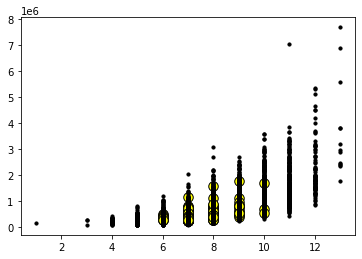

In [ ]:
#b)
# Here we can see distinct accepted apartments. 
# Firstly, we draw scatter using the distinct accepted apartments.
# Secondly, we draw a scatter using the first data frame and show all examples of the relation between grade and price
plt.scatter(data_frame2['grade'], data_frame2['price'], s=90, c='yellow', edgecolor='black')
plt.scatter(data_frame['grade'], data_frame['price'], s=10, c='black')
plt.show()


In [ ]:
#c)
# Find accepted apartments with best price to footage ratio.
# price / footage ratio -> sort 
sort_condition = (data_frame2['price'] / data_frame2['sqft_living']).sort_values().index
data_frame2.loc[sort_condition, :].head()

#Hint: .loc, .sort_values(), .index

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9704,7452500565,20140829T000000,260000.0,3,2.0,2710,5000,2.0,0,0,...,6,2710,0,1951,0,98126,47.5188,-122.373,850,5000
11258,7937600262,20140710T000000,379900.0,3,2.0,3110,44967,2.0,0,0,...,9,3020,90,1999,0,98058,47.4343,-122.082,2150,44967
19880,3832050860,20150319T000000,210000.0,3,2.0,1580,4961,2.0,0,0,...,7,1580,0,2006,0,98042,47.3338,-122.053,2280,5000
16014,5104450440,20141113T000000,252500.0,3,2.0,1810,10684,2.0,0,0,...,8,1810,0,1987,0,98058,47.4619,-122.153,2140,9657
20906,3355400242,20141028T000000,274900.0,3,2.0,1936,6612,2.0,0,0,...,7,1936,0,2014,0,98001,47.2602,-122.246,1620,21600
